# ISLR-Python Ch4 Applied 13

- [Load Boston Dataset](#Load-Boston-Dataset)
- [Explore Predictor Response Relationship](#Explore-Predictor-Response-Relationship)
- [Split Data into Train/Test Sets](#Split-Data-into-Test\Train-Sets)
- [Logistic Regression of Suburb Crime Rate](#Logistic-Regression-of-Crime-Rate)
- [LDA Classification of Suburb Crime Rate](#LDA-Classification-of-Suburb-Crime-Rate)
- [KNN Classification of Suburb Crime Rate](#KNN-Classification-of-Suburb-Crime-Rate)

In [1]:
## perform imports and set-up
import numpy as np
import pandas as pd
import statsmodels.api as sm

from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import load_boston
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

## Load Boston Dataset

In [2]:
# Load Boston housing data set
boston = load_boston()

# remind ourselves of what the variables are.
print(boston['DESCR'])

#Transform the data into a dataframe for analysis¶

# combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# now get the column names of the data frame
col_names = np.append(boston.feature_names, 'MEDV')

# create the data frame
df = pd.DataFrame(boston_data, columns = col_names)
df.head()

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


We now need to create a new column in the dataframe CRIM01. For each suburb, dataframe (row), if the CRIM of that suburb > Median(CRIM) CRIM01=True and otherwise False. It is a logical array representing whether each suburb is above or below the median crime rate of all the suburbs.

In [3]:
# add a column to the datafram where suburbs with CRIM > median(CRIM) is True and otherwise False
df['CRIM01'] = pd.Series(df.CRIM > df.CRIM.median(), index=df.index)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM01
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False


## Explore Predictor-Response Relationship

In order to perform our modeling of the CRIM01 Response, we need to first examine which predictors may influence the Response. Scatter-plots and Box-plots are incredibly useful for looking at how the data is distributed among classes. Lets start with some scatterplots.

### Scatter Plots

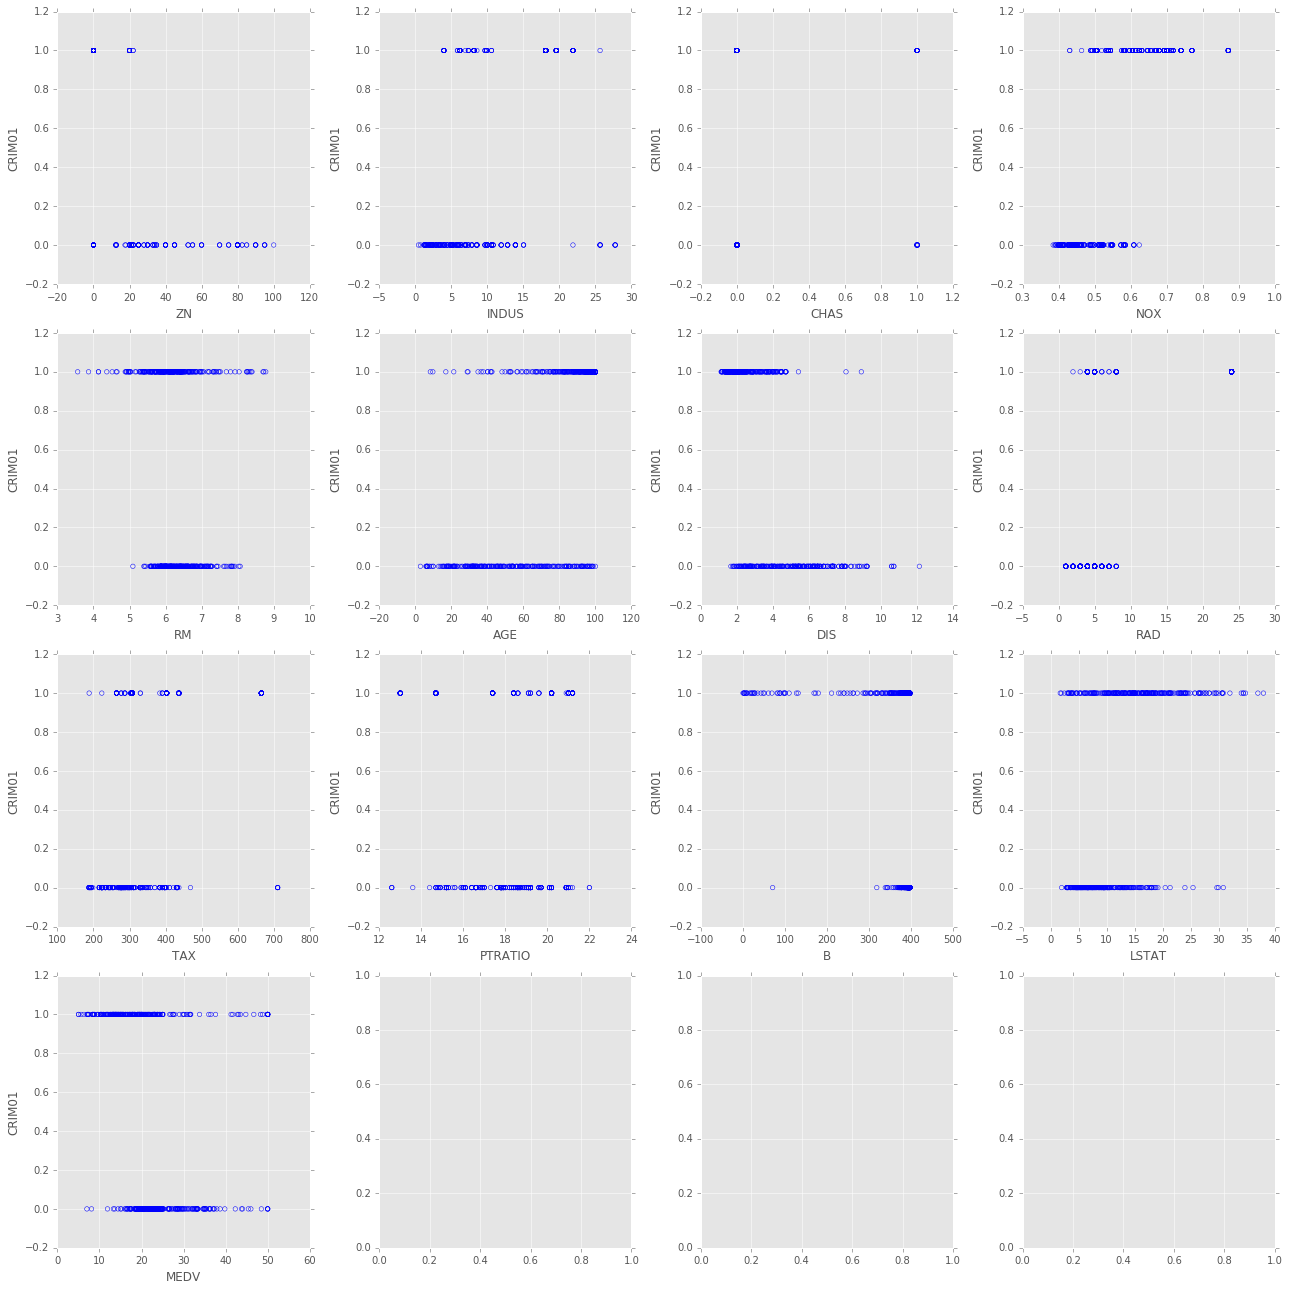

In [4]:
# Make a series of scatterplots between each of the predictors and the response (CRIM01)
predictors = df.columns[1:14]

# since we have 14 plots to generate make a 4x4 axarray
fig, axarr = plt.subplots(4,4,figsize=(18,18))

# create indices for plots
indices = np.unravel_index(np.arange(0,13),(4,4))
indices = list(zip(indices[0],indices[1]))

for _, (index, predictor) in enumerate(zip(indices, predictors)):
    axarr[index].scatter(df[predictor].values, df['CRIM01'].values, facecolors='none', edgecolors='b')
    axarr[index].set_xlabel(predictor)
    axarr[index].set_ylabel('CRIM01')
    
plt.tight_layout()

Candidates for predictors appear to be NOX, RM, AGE, PTRATIO, LSTAT, MEDV. We can take a look at some box plots to get an idea of whether these predictors are different for each class of CRIM01.

### Boxplots

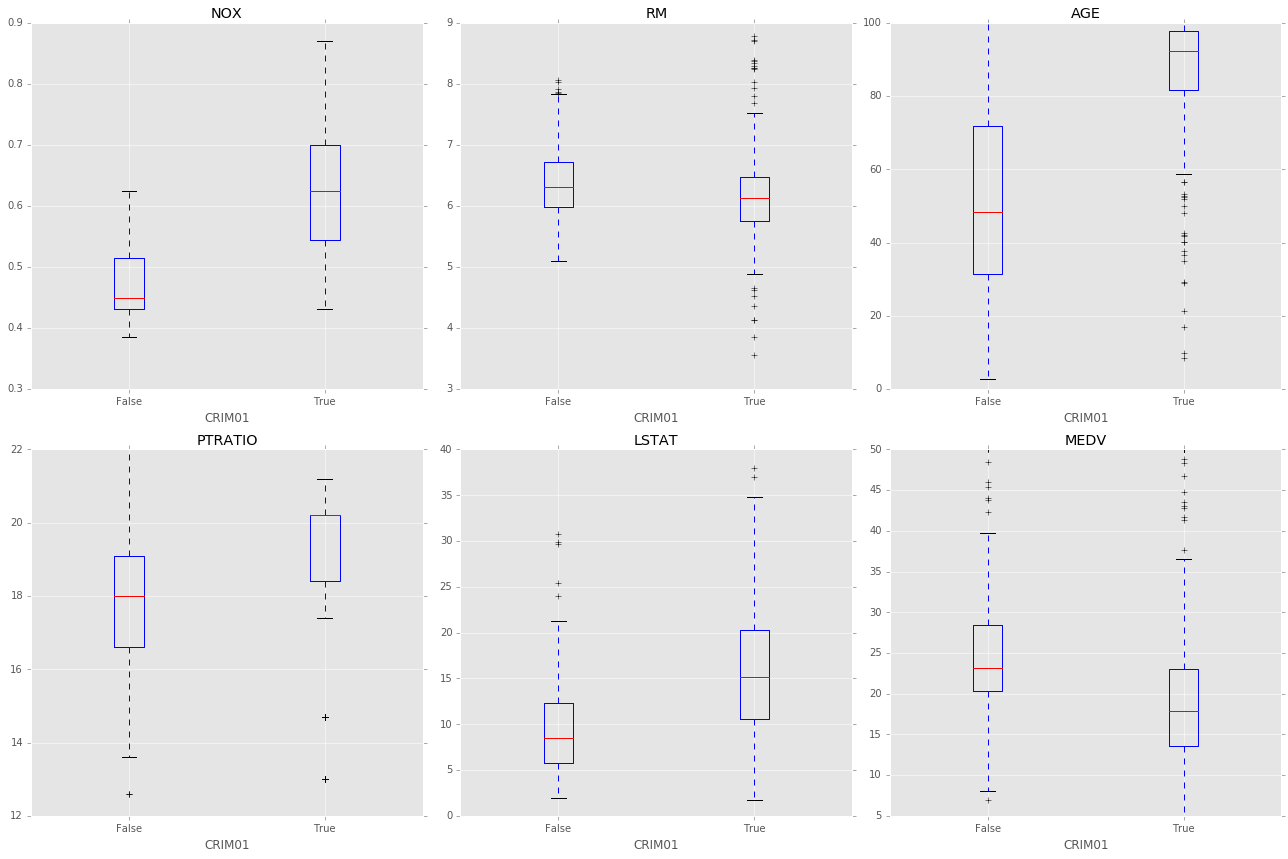

In [5]:
# Construct box plots grouped by MPG01
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(18,12))
df.boxplot(['NOX'], by='CRIM01', ax=ax1);
df.boxplot(['RM'],by='CRIM01',ax=ax2);
df.boxplot(['AGE'], by='CRIM01', ax=ax3);
df.boxplot(['PTRATIO'], by='CRIM01', ax=ax4);
df.boxplot(['LSTAT'],by='CRIM01',ax=ax5);
df.boxplot(['MEDV'], by='CRIM01', ax=ax6);

plt.tight_layout()
fig.suptitle(''); # remove pandas auto title

From these plots we can see that NOX, AGE, PTRATIO, LSTAT, and MEDV will be useful in predicting CRIM01 class membership because for each predictor, the medians of the two classes are very different.

## Split Data into Test/Train Sets

In [6]:
# select 400 random samples from dataframe for training
rows = np.random.choice([True, False], 400)
df_train = df.loc[rows]
df_test = df.loc[~rows]

## Logistic Regression of Suburb Crime Rate

In [18]:
# Get Training/Test Predictors and Responses #
##############################################
predictors = ['NOX', 'AGE', 'PTRATIO', 'LSTAT', 'MEDV']
X_train = sm.add_constant(df_train[predictors])
X_test = sm.add_constant(df_test[predictors])

y_train = df_train.CRIM01.values
y_test = df_test.CRIM01.values

#Create Model, Fit and Evaluate #
##################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print('\n', results.summary()) 
# use the fit to estimate the predicted probability and convert to boolean
y_predicted = results.predict(X_test) > 0.5
print('\n **The error rate of the LOGISTIC model is {0:.2f}%** '.format(100*np.mean(y_predicted!=y_test)))

Optimization terminated successfully.
         Current function value: 0.265704
         Iterations 8

                            Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  203
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Jul 2016   Pseudo R-squ.:                  0.5914
Time:                        08:53:57   Log-Likelihood:                -53.938
converged:                       True   LL-Null:                       -132.01
                                        LLR p-value:                 6.564e-32
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.0435      6.393     -5.325      0.000       -46.574   -21.513
NOX           39.8438      

Interestingly, the AGE and LSTAT did not have statistically significant coeffecients. This may be due to correlations between the predictors. Let's take a look...

In [8]:
print('\n Correlations = \n' , df_train[predictors].corr())


 Correlations = 
               NOX       AGE   PTRATIO     LSTAT      MEDV
NOX      1.000000  0.698991  0.061212  0.424367 -0.186892
AGE      0.698991  1.000000  0.169071  0.510048 -0.222953
PTRATIO  0.061212  0.169071  1.000000  0.299030 -0.423718
LSTAT    0.424367  0.510048  0.299030  1.000000 -0.674616
MEDV    -0.186892 -0.222953 -0.423718 -0.674616  1.000000


Yes, AGE is correlated with NOX, and LSTAT. LSTAT is correlated with NOX, AGE and MEDV. This explains why these predictors are not significant. So the set of predictors to use in our models will be NOX, PTRATIO and MEDV.

## LDA Classification of Suburb Crime Rate

In [13]:
# Get Predictors and Responses #
################################
# from the logistic regression we determined NOX, PTRATIO and MEDV to be the indpt predictors associated with CRIM01
predictors = ['NOX', 'PTRATIO', 'MEDV']

# create a training/Testing design matrix
X_train = df_train[predictors].values
X_test = df_test[predictors].values

# get the train/test responses
y_train = df_train.CRIM01.values
y_test = df_test.CRIM01.values

# Build LDA Classifier and Fit #
################################
lda_clf = LDA(solver='lsqr',store_covariance=True)
lda_clf.fit(X_train,y_train)

print('Class Priors =', lda_clf.priors_)
print('Class Means =', lda_clf.means_[0], lda_clf.means_[1])
print('Coeffecients =', lda_clf.coef_)

# Predict Test Data and Evaluate #
##################################
y_predicted = lda_clf.predict(X_test)
print('\n **The error rate of the LDA model is {0:.2f}%** '.format(100*np.mean(y_predicted!=y_test)))

Class Priors = [ 0.6453  0.3547]
Class Means = [  0.467   17.7733  24.9954] [  0.6209  18.3278  25.0083]
Coeffecients = [[ 32.5375   0.3527   0.1082]]
[False False False]

 **The error rate of the LDA model is 19.29%** 


## KNN Classification of Suburb Crime Rate

Test Error Rates= [ 0.2437  0.2741  0.203   0.2487  0.2284  0.2335  0.2132  0.2234  0.2081
  0.2132  0.2183  0.2284  0.2183  0.2132  0.2234  0.2132  0.198   0.198
  0.203   0.203 ]


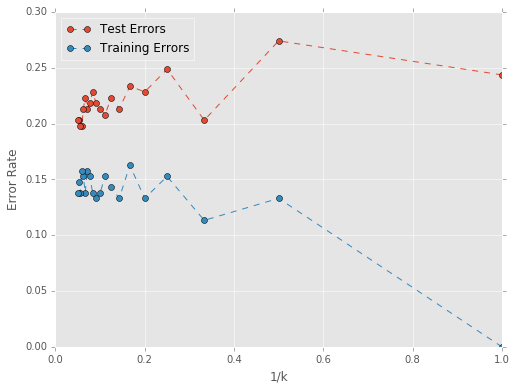

In [19]:
# make arrays to hold training/test error rates for each of the  k-values between 1 and 20
train_error_rate = np.zeros(20)
test_error_rate = np.zeros(20)
k_values = np.arange(1,21)

# Build 20 KNN classifiers varying k between 1 and 20 and evaluate the model's performance
for idx, k in enumerate(k_values):
    # Construct a KNN classifier and fit
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    # use the model on the training data to get training error rate
    y_train_predicted = knn.predict(X_train)
    # compute the training error rate for this k-value
    train_error_rate[idx] = np.mean(y_train_predicted!=y_train)
    
    # Use the model on the held out test data
    y_test_predicted = knn.predict(X_test)
    # compute the error rate for this k-value
    test_error_rate[idx] = np.mean(y_test_predicted!=y_test)

print('Test Error Rates=', test_error_rate)
    
# Plot Train and Test Error Rate
fig, ax = plt.subplots(figsize=(8,6))
inverse_k = 1/k_values
ax.plot(inverse_k, test_error_rate, linestyle='--', marker='o', label='Test Errors');
ax.plot(inverse_k, train_error_rate,linestyle='--', marker='o', label='Training Errors')
ax.set_xlabel('1/k')
ax.set_ylabel('Error Rate')
plt.legend(loc='best');

So comparing these models, we find that the logistic model is outperforming both the LDA and KNN models. There are a few scenarios that may account for why this is so. 1) The predictor observations may not be drawn from a normal distribution thus violating the assumptions of the LDA model. 2) The KNN model may not be performing well because the training set is small (400 observations) so it may have a low bias on the training data (error rate for k=3 is ~11%) but the model pays a price in high variance.